# Pipeline 1: 
#### _Normalization -> Z Score -> 3 STD_
_Locked Up_ - Bridget Weill - Fairfield University - MSBA Capstone Project

------------------

## Import Packages & Data

In [18]:
# import required packages for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from scipy.stats import boxcox
from scipy import stats

In [19]:
datacatenc = pd.read_csv('data_cat_enc.csv')

In [20]:
datacont = pd.read_csv('datacont.csv')

In [21]:
target = pd.read_csv('target.csv')

## Normalization

Normalizing the skewness of the data makes it more symmetric. With symmetric data, the mean, median & mode will be equal, if not, the data is either positively or negatively skewed.
- *Symmetrical*: skewness between -0.5 and 0.5 (closer to 0 the better)
- *Moderately Skewed*: skewness between -1 and -0.5 or 0.5 and 1
- *Highly Skewed*: skewness less than -1 or greater than 1

__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [22]:
datacont.skew()

Age     0.645001
dtype: float64

In [23]:
datacont["AgeSkew"]= stats.yeojohnson(datacont["Age "])[0]

In [24]:
data_cont_norm = datacont.drop(['Age '], axis=1)

In [25]:
data_cont_norm.skew()

AgeSkew    0.00647
dtype: float64

## __Z Score__

The Z Score is used to scale and transform the data: 
- Large outliers are minimized by transforming the data to the ZScore
- A box plot can be used to check the results, the range should not be as signifigant as it was prior to scaling

In [26]:
# create scaler
scaler = StandardScaler()

# fit and transform in one step
data_cont_norm = scaler.fit_transform(data_cont_norm)
data_cont_transform = pd.DataFrame(data_cont_norm)

_Rename the columns back after the transformation_

In [27]:
data_cont_transform.columns=['AgeSkew']

__Visualize the Results in a Boxplot:__

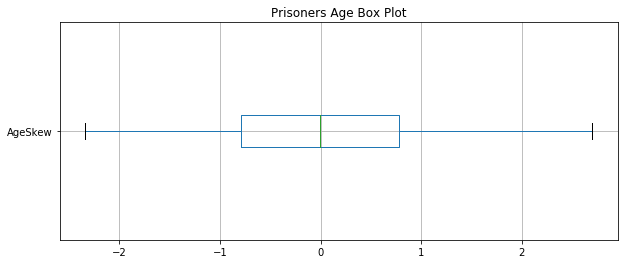

In [28]:
data_cont_transform.boxplot(vert=False, figsize=(10,4))
plt.title('Prisoners Age Box Plot')
plt.show()

- This box plot is more standardized with a range of values between -3 and 3

In [29]:
data_cont_transform.describe()

,AgeSkew
count,3.474000e+03
mean,-2.135310e-15
std,1.000144e+00
min,-2.340195e+00
25%,-7.871287e-01
50%,-9.752440e-03
75%,7.791349e-01
max,2.703841e+00


## __3 STD__

The Standard Deviation (3STD) measures the variation between each data point and the mean in a dataset. 

The standard deviation is used to determine and handle outliers.
- A loop is used to find and replace the numbers outside the upper and lower bounds. standard deviation determines these upper and lower bounds through the following formulas:
    - UpperBound = mean + 3(StandardDeviation)
    - LowerBound = mean - 3(StandardDeviation)
- Next, the for loop will replace the data outside of these bounds with the standard deviation
    - If the value is > UpperBound, it will be replaced with the UpperBound value
    - If the value is < LowerBound, it will be replaced with the LowerBound value
- A box plot can be used to check the results, there should be no black dotted outliers on the plot anymore

__Set the Upper Bound to 3 Standard Deviations Above the Mean:__

In [36]:
for col in data_cont_transform.columns:
    u_bound = data_cont_transform[col].mean() + 3* data_cont_transform[col].std()
    data_cont_transform[col][data_cont_transform[col] > u_bound] = u_bound

__Set the Lower Bound to 3 Standard Deviations Below the Mean:__

In [37]:
for col in data_cont_transform.columns:
    l_bound = data_cont_transform[col].mean() - 3*data_cont_transform[col].std()
    data_cont_transform[col][data_cont_transform[col] < l_bound] = l_bound

__Visualize the Results in a Boxplot:__

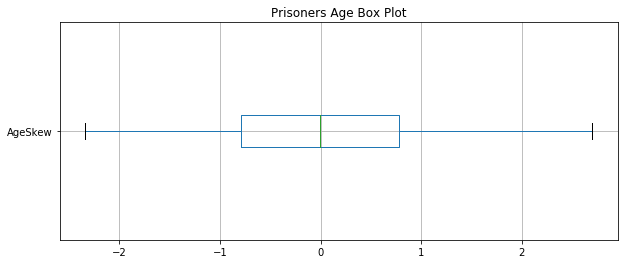

In [38]:
data_cont_transform.boxplot(vert=False, figsize=(10,4))
plt.title('Prisoners Age Box Plot')
plt.show()

- The 3 Standard Deviation transformation did not make much of a difference at all from the previous step of using Zscore.

## __Correlation__

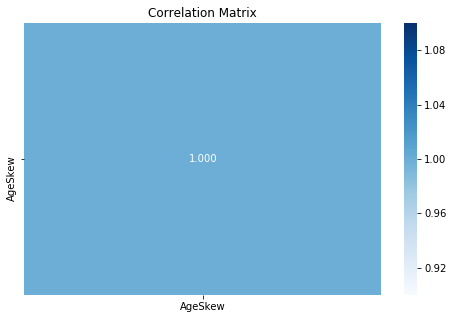

In [40]:
corr = data_cont_transform.corr()
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

- Since there is only 1 continuous value, there is no correlation with other variables

__Final DataFrame__

- Connect all 3 dataframes back together and save them as a csv

In [41]:
pipeline1 = pd.concat([data_cont_transform,datacatenc,target], axis=1)
pipeline1.head()

,AgeSkew,Sex_Female,Sex_Male,"Race_American Indian, Alaska Native non-Hispanic","Race_Asian, Pacific Islander, Native Hawaiian non-Hispanic",Race_Black non-Hispanic,Race_Hispanic,"Race_Multiple races, non-Hispanic",Race_White non-Hispanic,USCitizen_Not a US Citizen,...,Income_800-999,Income_No income,Weapons_Blunt object,Weapons_Firearm,Weapons_Knife,Weapons_None,Weapons_Other,Weapons_Other sharp object,Weapons_Toy or bb gun,CriminalHistoryEnc
0,0.536724,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1.348531,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.321097,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,-0.546051,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0.451735,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [42]:
pipeline1.to_csv('../BUAN6590-Capstone-BridgetWeill/pipeline1.csv', index=0)